In [ ]:
# q1

In [ ]:
# a

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import classification_report

df = pd.read_csv("data1/strongdrink.txt")
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = df[["alco","malic","tot_phen","color_int"]]
y = df["cultivar"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=20)
log = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial').fit(X, y)
pd.DataFrame({"j=1":np.append(log.intercept_[0],log.coef_[0]),
              "j=2":np.append(log.intercept_[1],log.coef_[1])},
               index=["beta0","beta1",'beta2','beta3','beta4'])

,j=1,j=2
beta0,-23.580699,23.701362
beta1,1.559151,-1.393679
beta2,-0.141648,-0.511138
beta3,1.554147,0.498860
beta4,0.113194,-1.146267


In [4]:
y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        10

   micro avg       0.98      0.98      0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



In [5]:
df['cultivar'].value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

In [4]:
# The group 1's error rate is 7%, group 2's error rate is 0% and group 3's error rate is also 0%.
# Group 3 is the model best at predicting.
# Since the second group has most observations, the most accurately predicted category is not the one with the most observations.


In [6]:
MSE_vs = ((y_test - y_pred) ** 2).sum() / y_pred.shape[0]
print('The MSE is', MSE_vs)

The MSE is 0.022727272727272728


In [5]:
# b

In [7]:
from sklearn.model_selection import LeaveOneOut

N_loo = X.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(X)
MSE_vec = np.zeros(N_loo)
X = df[["alco","malic","tot_phen","color_int"]].values
y = df["cultivar"].values
ytest = np.zeros(X.shape[0])
ypred = np.zeros(X.shape[0])
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ytest[test_index] = y_test
    LogReg = LogisticRegression(solver='newton-cg',multi_class='multinomial')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypred[test_index] = y_pred
    if y_test == y_pred:
        MSE_vec[test_index] = 0
    else:
        MSE_vec[test_index] = 1

MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()

print('The estimated MSE mean by LOOCV test is', MSE_loo)
print('The estimate MSE standard error by LOOCV test is', MSE_loo_std)
print(classification_report(ytest, ypred))

The estimated MSE mean by LOOCV test is 0.07954545454545454
The estimate MSE standard error by LOOCV test is 0.2705882022679695
              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.92      0.92      0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



In [8]:
# The group 1's error rate is 10%, group 2's error rate is 9% and group 3's error rate is 4%.
# All error rates are increasing compared with to part a.

In [ ]:
# c

In [9]:
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits = k, random_state = 20, shuffle = True)
kf.get_n_splits(X)

MSE_vec_kf = np.zeros(k)

ytest = np.zeros(X.shape[0])
ypred = np.zeros(X.shape[0])
k_ind = int(0)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ytest[test_index] = y_test

    LogReg = LogisticRegression(solver='newton-cg',multi_class='multinomial')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypred[test_index] = y_pred

    n = len(y_pred)
    err=[1 if y_test[i] != y_pred[i] else 0 for i in range(n)]  
    MSE_vec_kf[k_ind]=np.mean(err)
    
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)
print(classification_report(ytest, ypred))

test estimate MSE k-fold= 0.08522727272727273 test estimate MSE standard err= 0.02476647127011746
              precision    recall  f1-score   support

         1.0       0.90      0.92      0.91        59
         2.0       0.90      0.90      0.90        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.91      0.91      0.91       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.91      0.91       176



In [10]:
# The group 1's error rate is 14%, group 2's error rate is 9% and group 3's error rate is 4%.
# All error rates are increasing compare with part a and group 1 getting worse compare with part b.


In [11]:
# q2

In [12]:
# a

In [13]:
import matplotlib.pyplot as plt

df=pd.read_csv("data1/CoolIndex.txt",names=["Age","Cool"])
df.head()

,Age,Cool
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


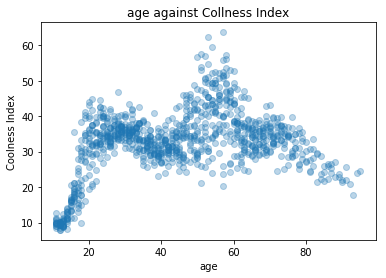

In [14]:
plt.scatter(df.Age,df.Cool,alpha=0.3)
plt.xlabel("age")
plt.ylabel("Coolness Index")
plt.title("age against Collness Index")
plt.show()

In [15]:
# b

In [16]:
import statsmodels.api as sm

df["bin1"]=np.where((df.Age>=11) & (df.Age<22),1,0)
df["bin2"]=np.where((df.Age>=22) & (df.Age<40),1,0)
df["bin3"]=np.where((df.Age>=40) & (df.Age<59),1,0)
df["bin4"]=np.where((df.Age>=59) & (df.Age<77),1,0)
df["bin5"]=np.where((df.Age>=77) & (df.Age<=95),1,0)

X=df[["bin1","bin2","bin3","bin4","bin5"]]
results=sm.OLS(df.Cool,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 26 Feb 2019   Prob (F-statistic):          3.73e-114
Time:                        15:52:41   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bin1          20.1025      0.562     35.746      0.0

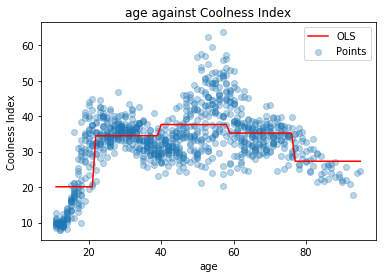

In [17]:
plt.scatter(df.Age,df.Cool,alpha=0.3,label="Points")
plt.plot(df.Age,results.predict(),"r",label = "OLS")
plt.legend()
plt.xlabel("age")
plt.ylabel("Coolness Index")
plt.title("age against Coolness Index")
plt.show()

In [18]:
results.predict([0,0,0,1,0])

array([35.22540004])

In [19]:
# The estimated step function values for each bin are 20.1025, 34.4758, 37.6351, 35.2254, 27.2964.
# The predicted coolness of a 73-year old from the stepwise function is 35.2254.

In [20]:
# c

In [21]:
from scipy.interpolate import LSQUnivariateSpline

df_2=df.groupby('Age').mean()
df_2['Age']=df_2.index
df_2.head()

,Cool,bin1,bin2,bin3,bin4,bin5,Age
Age,,,,,,,
11.0,10.110237,1,0,0,0,0,11.0
12.0,9.365623,1,0,0,0,0,12.0
13.0,10.015882,1,0,0,0,0,13.0
14.0,11.747109,1,0,0,0,0,14.0
15.0,15.434739,1,0,0,0,0,15.0


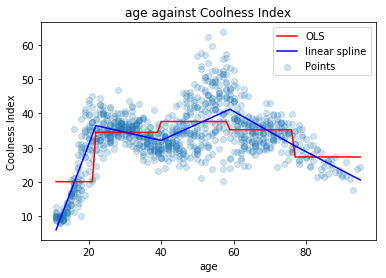

In [22]:
knots = [22,40,59,77]
linear_spline = LSQUnivariateSpline(np.array(df_2.Age), np.array(df_2.Cool), t = knots, k = 1)

plt.scatter(df.Age,df.Cool,alpha = 0.2,label = "Points")
plt.plot(df.Age,results.predict(),"r",label = "OLS")
plt.plot(df_2.Age,linear_spline(df_2.Age),"b",label = "linear spline")
plt.legend()
plt.xlabel("age")
plt.ylabel("Coolness Index")
plt.title("age against Coolness Index")
plt.show()

In [23]:
linear_spline(73)

array(32.86784862)

In [24]:
# The predicted coolness of a 73-year old from the cubic spline is 32.8678.

In [25]:
# d

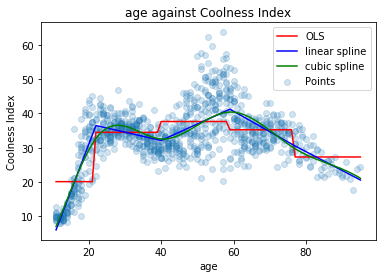

In [26]:
cubic_spline = LSQUnivariateSpline(np.array(df_2.Age), np.array(df_2.Cool), t=knots, k=3)

plt.scatter(df.Age,df.Cool,alpha=0.2,label="Points")
plt.plot(df.Age,results.predict(),"r",label = "OLS")
plt.plot(df_2.Age,linear_spline(df_2.Age),"b",label = "linear spline")
plt.plot(df_2.Age,cubic_spline(df_2.Age),"g",label = "cubic spline")
plt.legend()
plt.xlabel("age")
plt.ylabel("Coolness Index")
plt.title("age against Coolness Index")
plt.show()

In [27]:
cubic_spline (73)

array(32.64230107)

In [28]:
# The predicted coolness of a 73-year old from the cubic spline is 32.6423.